In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df['index'] = df.index+1

In [5]:
df.head()

,YearMonth,Sparkling,index
0,1980-01,1686,1
1,1980-02,1591,2
2,1980-03,2304,3
3,1980-04,1712,4
4,1980-05,1471,5


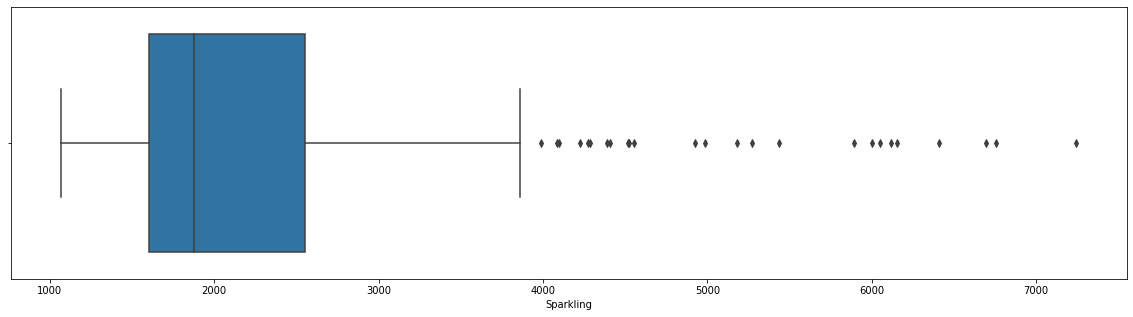

In [6]:
#checking outliers
fig = plt.subplots(figsize = (20,5))
ax = sns.boxplot(x = df['Sparkling'], whis = 1.5)

In [7]:
train = df[df.YearMonth<'1991'] 
test = df[df.YearMonth>'1991']

In [8]:
train

,YearMonth,Sparkling,index
0,1980-01,1686,1
1,1980-02,1591,2
2,1980-03,2304,3
3,1980-04,1712,4
4,1980-05,1471,5
...,...,...,...
127,1990-08,1605,128
128,1990-09,2424,129
129,1990-10,3116,130
130,1990-11,4286,131


In [9]:
test

,YearMonth,Sparkling,index
132,1991-01,1902,133
133,1991-02,2049,134
134,1991-03,1874,135
135,1991-04,1279,136
136,1991-05,1432,137
137,1991-06,1540,138
138,1991-07,2214,139
139,1991-08,1857,140
140,1991-09,2408,141
141,1991-10,3252,142


In [10]:
train_regr = train.copy()
test_regr = test.copy()

In [11]:
train_regr_x = train_regr[['index']]
train_regr_y = train_regr[['Sparkling']]
test_regr_x = test_regr[['index']]
test_regr_y = test_regr[['Sparkling']]

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_regr_x, train_regr_y)


LinearRegression()

In [13]:
pred_regr = lr.predict(test_regr_x)
pred_regr

array([[2791.65209345],
       [2797.48475196],
       [2803.31741046],
       [2809.15006896],
       [2814.98272746],
       [2820.81538597],
       [2826.64804447],
       [2832.48070297],
       [2838.31336147],
       [2844.14601998],
       [2849.97867848],
       [2855.81133698],
       [2861.64399548],
       [2867.47665399],
       [2873.30931249],
       [2879.14197099],
       [2884.9746295 ],
       [2890.807288  ],
       [2896.6399465 ],
       [2902.472605  ],
       [2908.30526351],
       [2914.13792201],
       [2919.97058051],
       [2925.80323901],
       [2931.63589752],
       [2937.46855602],
       [2943.30121452],
       [2949.13387302],
       [2954.96653153],
       [2960.79919003],
       [2966.63184853],
       [2972.46450703],
       [2978.29716554],
       [2984.12982404],
       [2989.96248254],
       [2995.79514104],
       [3001.62779955],
       [3007.46045805],
       [3013.29311655],
       [3019.12577506],
       [3024.95843356],
       [3030.791

In [14]:
from sklearn.metrics import mean_squared_error
## Test Data - RMSE

rmse_regr = mean_squared_error(test_regr_y,pred_regr,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_regr))

resultsDf = pd.DataFrame({'Test RMSE': [rmse_regr]},index=['Regression On Time Series'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


,Test RMSE
Regression On Time Series,1389.135175


# Regression after Removing outliers


In [15]:
df_out = pd.read_csv('Sparkling.csv')
df_out

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
...,...,...
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688


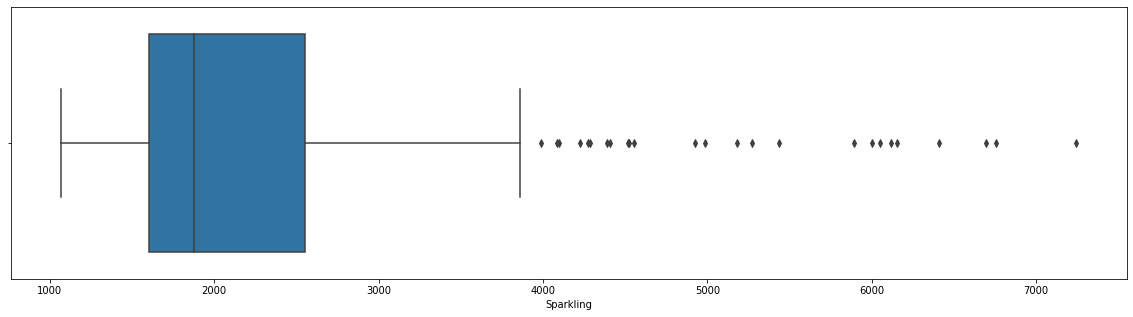

In [16]:
#checking outliers
fig = plt.subplots(figsize = (20,5))
ax = sns.boxplot(x = df['Sparkling'], whis = 1.5)

In [17]:
df_n = df_out.drop(index = df[df['Sparkling']>4000].index-1)
df_n

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
...,...,...
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688


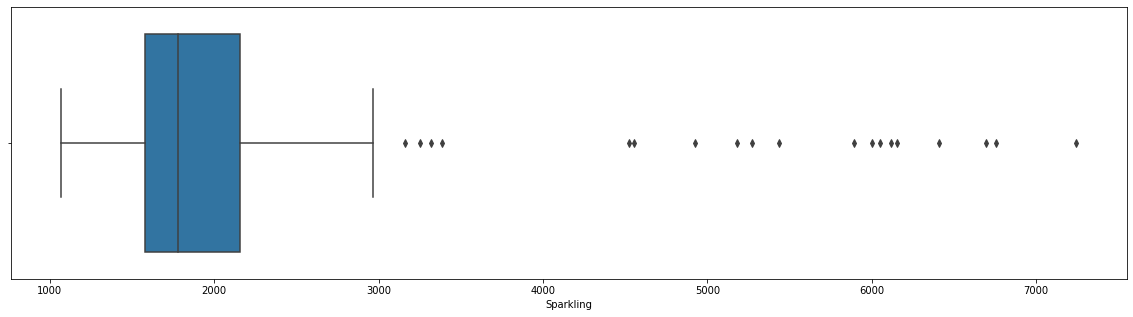

In [18]:
#checking outliers
fig = plt.subplots(figsize = (20,5))
ax = sns.boxplot(x = df_n['Sparkling'], whis = 1.5)

# Naive ForeCasting Method


In [19]:
arr = np.asarray(train.Sparkling)
y_hat = test.copy()
y_hat['Naive'] = arr[len(arr)-1]
y_hat

,YearMonth,Sparkling,index,Naive
132,1991-01,1902,133,6047
133,1991-02,2049,134,6047
134,1991-03,1874,135,6047
135,1991-04,1279,136,6047
136,1991-05,1432,137,6047
137,1991-06,1540,138,6047
138,1991-07,2214,139,6047
139,1991-08,1857,140,6047
140,1991-09,2408,141,6047
141,1991-10,3252,142,6047


In [20]:
from math import sqrt
rmse_naive = sqrt(mean_squared_error(test['Sparkling'],y_hat['Naive']))

In [21]:
rmse_naive

3864.2793518443914

In [22]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Approach on Time Series'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Regression On Time Series,1389.135175
Naive Approach on Time Series,3864.279352


Another approach using mean of the Target variable is also available


In [23]:
mean_train_target = train['Sparkling'].mean()
mean_train_target

2403.780303030303

In [24]:
y_hat['Naive_Average'] = train['Sparkling'].mean()
y_hat

,YearMonth,Sparkling,index,Naive,Naive_Average
132,1991-01,1902,133,6047,2403.780303
133,1991-02,2049,134,6047,2403.780303
134,1991-03,1874,135,6047,2403.780303
135,1991-04,1279,136,6047,2403.780303
136,1991-05,1432,137,6047,2403.780303
137,1991-06,1540,138,6047,2403.780303
138,1991-07,2214,139,6047,2403.780303
139,1991-08,1857,140,6047,2403.780303
140,1991-09,2408,141,6047,2403.780303
141,1991-10,3252,142,6047,2403.780303


In [25]:
rmse_naive_average = sqrt(mean_squared_error(test['Sparkling'],y_hat['Naive_Average']))
rmse_naive_average

1275.0818036965309

In [26]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_naive_average]},index=['Naive Approach on Time Series using mean of training data'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Regression On Time Series,1389.135175
Naive Approach on Time Series,3864.279352
Naive Approach on Time Series using mean of training data,1275.081804


# Simple Exponential Smoothing


In [27]:
SES_train = train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [28]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [29]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
pred_SES = model_SES_autofit.forecast(steps=len(test))
pred_SES

132    2724.929339
133    2724.929339
134    2724.929339
135    2724.929339
136    2724.929339
137    2724.929339
138    2724.929339
139    2724.929339
140    2724.929339
141    2724.929339
142    2724.929339
143    2724.929339
144    2724.929339
145    2724.929339
146    2724.929339
147    2724.929339
148    2724.929339
149    2724.929339
150    2724.929339
151    2724.929339
152    2724.929339
153    2724.929339
154    2724.929339
155    2724.929339
156    2724.929339
157    2724.929339
158    2724.929339
159    2724.929339
160    2724.929339
161    2724.929339
162    2724.929339
163    2724.929339
164    2724.929339
165    2724.929339
166    2724.929339
167    2724.929339
168    2724.929339
169    2724.929339
170    2724.929339
171    2724.929339
172    2724.929339
173    2724.929339
174    2724.929339
175    2724.929339
176    2724.929339
177    2724.929339
178    2724.929339
179    2724.929339
180    2724.929339
181    2724.929339
182    2724.929339
183    2724.929339
184    2724.

In [31]:
rmse_SES = mean_squared_error(test['Sparkling'],pred_SES,squared=False)
print("For SES forecast on the Test Data,  RMSE is %3.3f" %(rmse_SES))

For SES forecast on the Test Data,  RMSE is 1316.035


In [32]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_SES]},index=['Simple Exponential Smoothing on Time Series'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Regression On Time Series,1389.135175
Naive Approach on Time Series,3864.279352
Naive Approach on Time Series using mean of training data,1275.081804
Simple Exponential Smoothing on Time Series,1316.034674
